### Common Visualization functions for all tasks

In [4]:
file_path = "/Users/sahiravi/Documents/VAR/difficulty_human.csv"

In [5]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from IPython.display import display, Video, HTML
import seaborn as sns

# Function to find the distribution of the four metrics
def calculate_metric_distribution(df, task_prefix=""):
    metrics = ['unpredictability', 'clarity', 'complexity', 'events']
    metric_counts = {metric: [] for metric in metrics}
    
    # Collect scores from the dataset
    for index, row in df.iterrows():
        submitted_data_dict = ast.literal_eval(row['Submitted Data'])
        task_data = submitted_data_dict.get("Data", {}).get("taskData", {})
        
        for metric in metrics:
            score = task_data.get(f"{task_prefix}{metric}", None)
            if score is not None:
                metric_counts[metric].append(int(score))
    
    # Plot distribution for each metric with percentages on bars
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        metric_data = metric_counts[metric]
        
        if len(metric_data) > 0:
            ax = sns.histplot(metric_data, bins=5, ax=axes[i], kde=False, stat='percent', color='skyblue')
            axes[i].set_title(f'Distribution of {metric.capitalize()} Scores')
            axes[i].set_xlabel('Score')
            axes[i].set_ylabel('Percentage')

            # Add percentages on top of the bars
            total = len(metric_data)
            for p in ax.patches:
                percentage = f'{(p.get_height()):.1f}%'
                ax.annotate(percentage, 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', xytext=(0, 9), 
                            textcoords='offset points', fontsize=10, color='black')
        else:
            axes[i].set_title(f'No Data for {metric.capitalize()}')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display the average score for each metric
    for metric in metrics:
        if len(metric_counts[metric]) > 0:
            avg_score = sum(metric_counts[metric]) / len(metric_counts[metric])
            print(f"Average {metric.capitalize()} Score: {avg_score:.2f}")
        else:
            print(f"No data available for {metric.capitalize()}.")

# Function to parse "Task Data" and extract video links based on headers
def get_videos_and_reference(task_data):
    task_data_dict = ast.literal_eval(task_data)
    row_data = task_data_dict.get("RowData", [])
    
    videos = {}
    reference_text = None
    
    # Combine base URL and video names for each header
    base_url = next((item['CellData'] for item in row_data if item['ColumnHeader'] == 'full_video_url'), None)
    diff = next((item['CellData'] for item in row_data if item['ColumnHeader'] == 'difficulty'), None)

    videos[base_url] = f"{base_url}"
  
    return videos, diff

# Function to extract metrics based on the task configuration (t1, t2, t3)
def get_metrics(submitted_data, task_prefix=""):
    submitted_data_dict = ast.literal_eval(submitted_data)
    task_data = submitted_data_dict.get("Data", {}).get("taskData", {})
    
    metrics = ['unpredictability', 'clarity', 'complexity', 'events']
    metrics_info = []
    unpred_mapped = "easy"
    # Gather each metric score and its corresponding reason
    for metric in metrics:
        score = task_data.get(f"{task_prefix}{metric}", "N/A")
        # reason = task_data.get(f"{metric}Reason", "N/A")
        metrics_info.append(f"{metric.capitalize()} Score: {score}")

        if metric=="unpredictability":
            # 1, 2 (Low) → 1 (Low)
            # 3 (Medium) → 2 (Medium)
            # 4, 5 (High) → 3 (High)

            if score == 1 or score == 2:
                unpred_mapped = "easy"
            elif score == 3:
                unpred_mapped = "medium"
            else:
                unpred_mapped = "hard"
        # metrics_info.append(f"{metric.capitalize()} Reason: {reason}")
    
    return "\n".join(metrics_info), unpred_mapped

# Function to display videos side by side
def display_videos(videos_dict):
    video_tags = []
    for header, video_link in videos_dict.items():
        if video_link:
            video_tags.append(f'<video src="{video_link}" controls width="300"></video>')
    
    return HTML(" ".join(video_tags))

# Configuration: choose 't1', 't2', or 't3'

def visualize(csv_file):

    match = 0   
    df = pd.read_csv(csv_file)

    # Filter out rows where "Task Data" is None or NaN
    df_filtered = df[df['Task Data'].notna()]

    # Display each video (or videos) based on configuration along with reference text and metrics
    for index, row in df_filtered.iterrows():
        videos, dif = get_videos_and_reference(row['Task Data'])
        
        print("Difficulty Automatic:\n", dif)
        
        # Display the videos side by side
        display(display_videos(videos))
        
        # Get and print the corresponding metrics
        metrics_info, unpred_mapped = get_metrics(row['Submitted Data'])
        print("Metrics:\n", metrics_info)
        print("\n" + "="*50 + "\n")

        if dif == unpred_mapped:
            match += 1

    print("Difficulty match with human", match)
    calculate_metric_distribution(df_filtered)

###  Plot

Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 5
Clarity Score: 2
Complexity Score: 2
Events Score: 1


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 3
Clarity Score: 5
Complexity Score: 2
Events Score: 3


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 4
Clarity Score: 5
Complexity Score: 2
Events Score: 2


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 3
Clarity Score: 5
Complexity Score: 2
Events Score: 1


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 5
Clarity Score: 5
Complexity Score: 1
Events Score: 3


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 4
Clarity Score: 4
Complexity Score: 2
Events Score: 2


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 4
Clarity Score: 5
Complexity Score: 2
Events Score: 4


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 1
Clarity Score: 5
Complexity Score: 3
Events Score: 3


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 3
Clarity Score: 5
Complexity Score: 1
Events Score: 1


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 5
Clarity Score: 4
Complexity Score: 4
Events Score: 2


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 2
Clarity Score: 4
Complexity Score: 1
Events Score: 1


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 4
Clarity Score: 5
Complexity Score: 2
Events Score: 2


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 3
Clarity Score: 5
Complexity Score: 2
Events Score: 2


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 4
Clarity Score: 5
Complexity Score: 1
Events Score: 1


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 2
Clarity Score: 4
Complexity Score: 2
Events Score: 4


Difficulty Automatic:
 easy


Metrics:
 Unpredictability Score: 4
Clarity Score: 2
Complexity Score: 4
Events Score: 2


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 4
Clarity Score: 4
Complexity Score: 4
Events Score: 2


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 4
Clarity Score: 3
Complexity Score: 3
Events Score: 2


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 3
Clarity Score: 4
Complexity Score: 2
Events Score: 2


Difficulty Automatic:
 medium


Metrics:
 Unpredictability Score: 2
Clarity Score: 5
Complexity Score: 4
Events Score: 2


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 4
Clarity Score: 4
Complexity Score: 2
Events Score: 2


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 4
Clarity Score: 3
Complexity Score: 3
Events Score: 4


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 2
Clarity Score: 1
Complexity Score: 2
Events Score: 1


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 2
Clarity Score: 4
Complexity Score: 2
Events Score: 2


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 4
Clarity Score: 4
Complexity Score: 2
Events Score: 4


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 5
Clarity Score: 5
Complexity Score: 5
Events Score: 5


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 2
Clarity Score: 4
Complexity Score: 2
Events Score: 1


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 1
Clarity Score: 3
Complexity Score: 2
Events Score: 1


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 3
Clarity Score: 5
Complexity Score: 3
Events Score: 1


Difficulty Automatic:
 hard


Metrics:
 Unpredictability Score: 2
Clarity Score: 4
Complexity Score: 2
Events Score: 2


Difficulty match with human 10


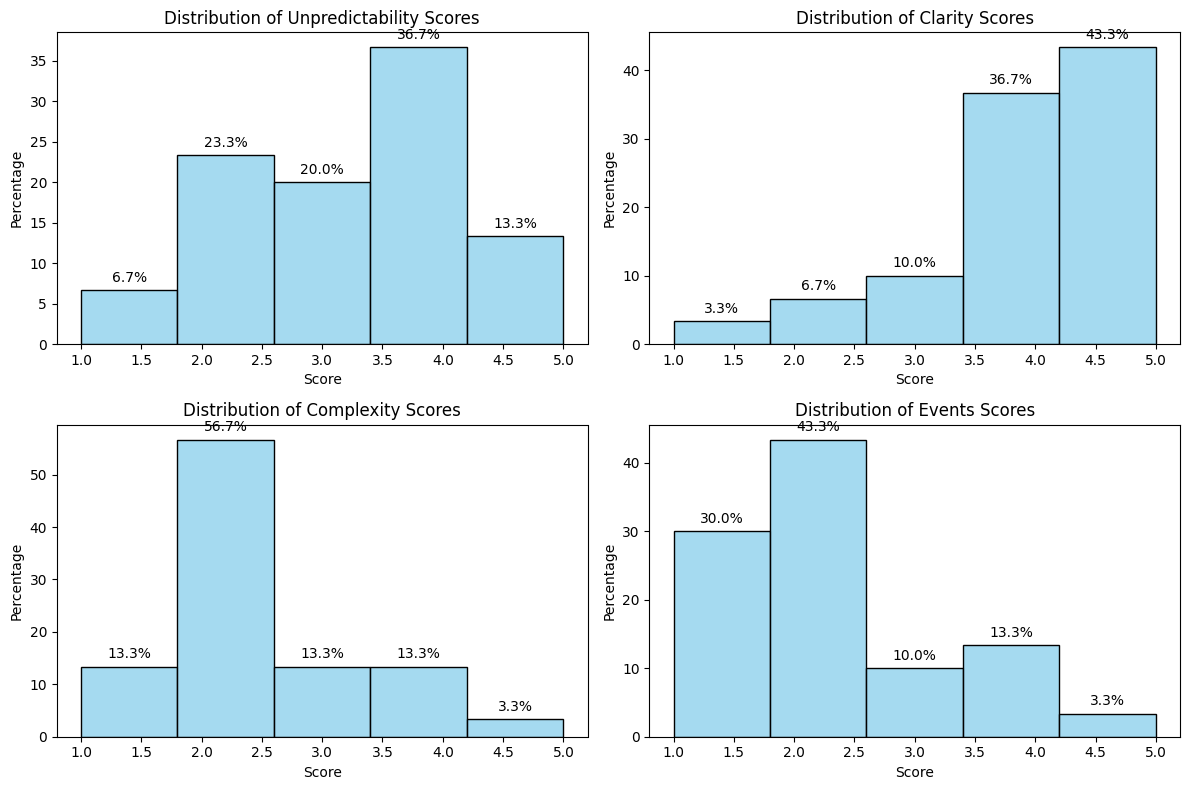

Average Unpredictability Score: 3.27
Average Clarity Score: 4.10
Average Complexity Score: 2.37
Average Events Score: 2.17


In [6]:

visualize(csv_file=file_path)